Importing all the required libraries

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Inputting the CSV file

In [59]:
bike = pd.read_csv('day.csv')

In [60]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [61]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<AxesSubplot:>

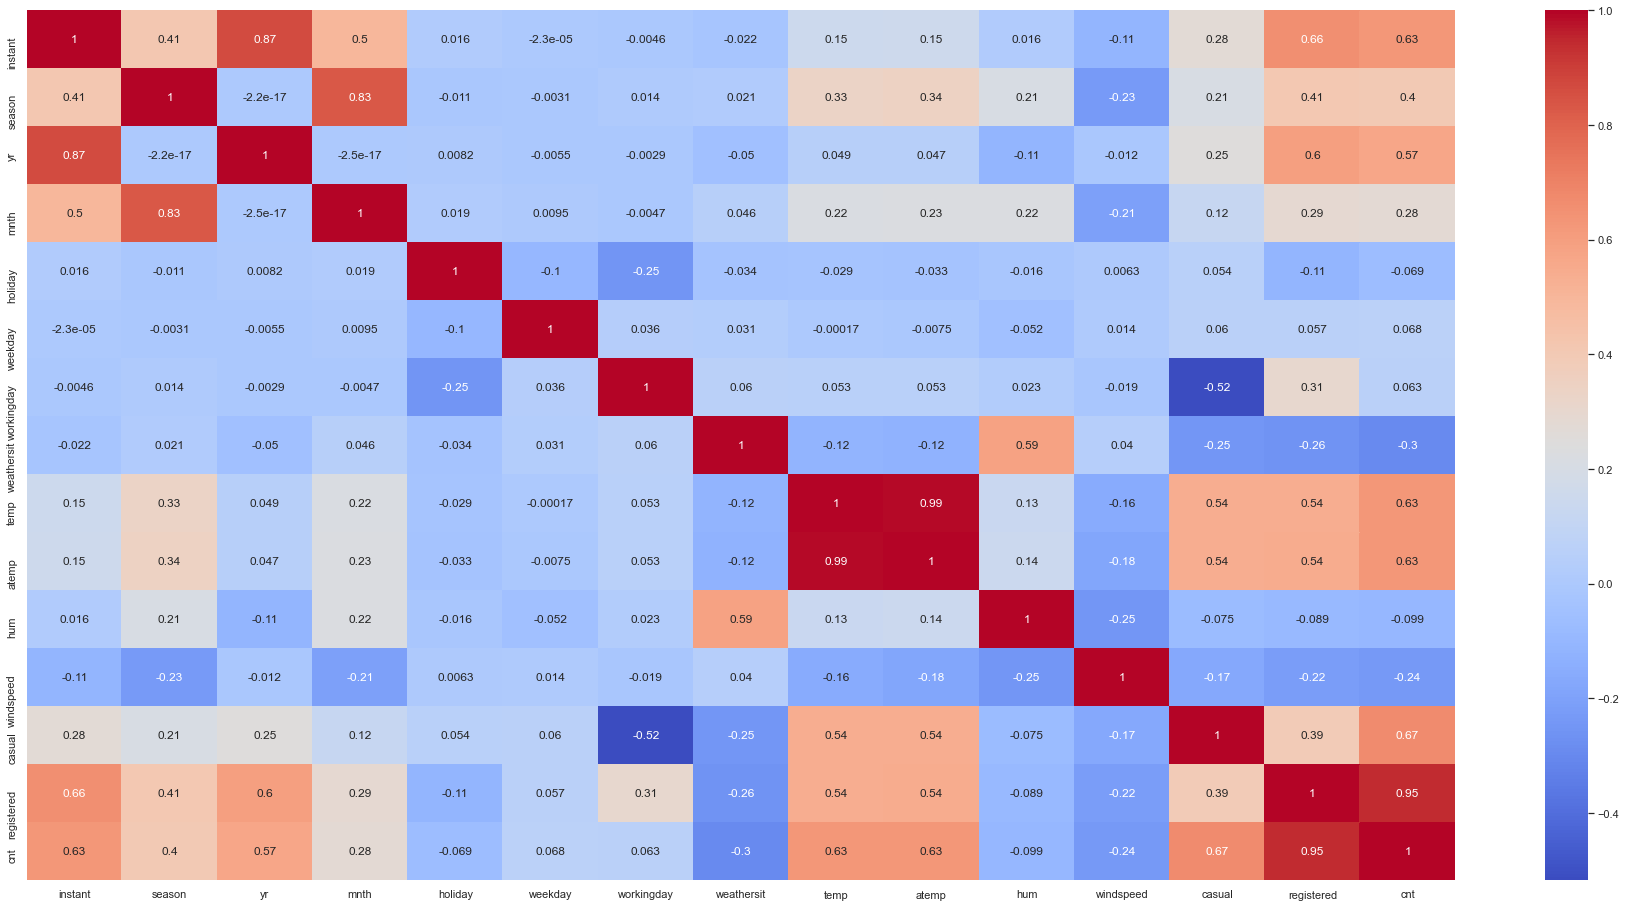

In [62]:
sns.set(rc = {'figure.figsize':(32,16)})
sns.heatmap(bike.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

Data Preparation and Cleaning

Replacing numerical categorical variables with full variables and then creating dummy variables

In [63]:
replace_dict = {1: 'Spring', 2: "Summer", 3: "Fall", 4: "Winter"}

bike = bike.replace({"season": replace_dict})

In [64]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [65]:
full_season = pd.get_dummies(bike['season'], drop_first = True)

In [66]:
full_season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Replacing numerical categorical variables with full variables and then creating dummy variables

In [67]:
replace_dict = {1: 'Q1', 2: "Q1", 3: "Q1", 4: "Q2", 5: "Q2", 
                6: "Q2", 7:"Q3", 8: "Q3", 9: "Q3", 10: "Q4",
               11: "Q4", 12: "Q4"}

bike = bike.replace({"mnth": replace_dict})

In [68]:
full_months =  pd.get_dummies(bike['mnth'], drop_first = True)

In [69]:
full_months.head()

,Q2,Q3,Q4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


Replacing numerical categorical variables with full variables and then creating dummy variables

In [70]:
replace_dict = {1: 'Clear', 2: "Misty", 3: "Light Snow", 4: "Heavy Rain"}

bike = bike.replace({"weathersit": replace_dict})

In [71]:
full_weathersit = pd.get_dummies(bike['weathersit'], drop_first = True)

In [72]:
full_weathersit.head()

,Light Snow,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


Merging all the dummy variables with the Bike dataset

In [73]:
bike = pd.concat([bike, status], axis = 1)

In [74]:
bike = pd.concat([bike, full_months], axis = 1)

In [75]:
bike = pd.concat([bike, full_weathersit], axis = 1)

In [76]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,Spring,Summer,Winter,Q2,Q3,Q4,Light Snow,Misty
0,1,01-01-2018,Spring,0,Q1,0,6,0,Misty,14.110847,...,654,985,1,0,0,0,0,0,0,1
1,2,02-01-2018,Spring,0,Q1,0,0,0,Misty,14.902598,...,670,801,1,0,0,0,0,0,0,1
2,3,03-01-2018,Spring,0,Q1,0,1,1,Clear,8.050924,...,1229,1349,1,0,0,0,0,0,0,0
3,4,04-01-2018,Spring,0,Q1,0,2,1,Clear,8.200000,...,1454,1562,1,0,0,0,0,0,0,0
4,5,05-01-2018,Spring,0,Q1,0,3,1,Clear,9.305237,...,1518,1600,1,0,0,0,0,0,0,0


Dropping variables that didn't make much sense or had a good alternative

In [77]:
bike.drop(['instant', 'temp', 'dteday', 'season', 'mnth', 'weathersit', 'casual', 'registered'], axis = 1, inplace = True)


In [78]:
bike.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Q2,Q3,Q4,Light Snow,Misty
0,0,0,6,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1
1,0,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1
2,0,0,1,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0
3,0,0,2,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0
4,0,0,3,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0


Building the Model

In [79]:
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [80]:
y_train = df_train.pop('cnt')
X_train = df_train

In [81]:
x_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.3
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.87e-181
Time:                        05:41:43   Log-Likelihood:                -4129.6
No. Observations:                 510   AIC:                             8291.
Df Residuals:                     494   BIC:                             8359.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1728.0079    377.831      4.573      0.000     985.654    2470.362
yr          2022.4672     72.784     27.787      0.000    1879.464    2165.471
holiday     -503.3319    235.813     -2.134      0.033    -966.652     -40.012
weekday       73.5080     18.024      4.078      0.000      38.095     108.921
workingday   167.8984     79.106      2.122      0.034      12.473     323.324
atemp        106.2084      8.469     12.541      0.000      89.568     122.849
hum          -10.7268      3.507     -3.059      0.002     -17.616      -3.837
windspeed    -44.2100      7.409     -5.967      0.000     -58.767     -29.653
Spring      -458.8730    252.909     -1.814      0.070    -955.783      38.037
Summer       470.8453    211.172      2.230      0.026      55.939     885.751
Winter      1213.2414    232.625      5.215      0.000     756.185    1670.298
Q2           216.5245    196.815      1.100      0.272    -170.174     603.223
Q3           477.3598    243.810      1.958      0.051      -1.672     956.392
Q4          -281.7925    207.353     -1.359      0.175    -689.195     125.610
Light Snow -2128.4402    237.138     -8.976      0.000   -2594.364   -1662.516
Misty       -534.3065     94.823     -5.635      0.000    -720.613    -348.000
==============================================================================
Omnibus:                       73.903   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.141
Skew:                          -0.709   Prob(JB):                     7.73e-45
Kurtosis:                       5.748   Cond. No.                         976.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
X_train_new = x_train_sm.drop(['const'], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,32.86
4,atemp,27.73
11,Q3,9.73
9,Winter,8.67
12,Q4,8.16
6,windspeed,6.97
10,Q2,6.90
8,Summer,6.73
7,Spring,6.62
3,workingday,3.21


Removing variables with high VIF and a high p-value

In [83]:
X_train_new = x_train_sm.drop([ "Q4", 'Spring'], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.79
10,Q2,4.56
11,Q3,3.55
8,Summer,3.41
5,atemp,3.17
6,hum,1.89
13,Misty,1.58
9,Winter,1.53
12,Light Snow,1.24
7,windspeed,1.19


In [84]:
lr = sm.OLS(y_train, X_train_new)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          6.81e-183
Time:                        05:41:52   Log-Likelihood:                -4131.6
No. Observations:                 510   AIC:                             8291.
Df Residuals:                     496   BIC:                             8350.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1264.5610    279.392      4.526      0.000     715.622    1813.500
yr          2020.2450     72.789     27.755      0.000    1877.232    2163.258
holiday     -517.4403    236.036     -2.192      0.029    -981.194     -53.686
weekday       72.5194     18.048      4.018      0.000      37.060     107.979
workingday   174.7666     79.178      2.207      0.028      19.200     330.333
atemp        110.7745      7.896     14.030      0.000      95.262     126.287
hum          -11.6127      3.484     -3.333      0.001     -18.459      -4.767
windspeed    -45.1703      7.407     -6.098      0.000     -59.723     -30.617
Summer       745.0937    153.897      4.842      0.000     442.724    1047.464
Winter      1359.1758    102.368     13.277      0.000    1158.047    1560.304
Q2           375.5532    179.831      2.088      0.037      22.229     728.877
Q3           847.3527    155.229      5.459      0.000     542.366    1152.339
Light Snow -2086.0173    236.527     -8.819      0.000   -2550.736   -1621.298
Misty       -522.2706     94.789     -5.510      0.000    -708.509    -336.033
==============================================================================
Omnibus:                       70.827   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.544
Skew:                          -0.678   Prob(JB):                     3.45e-43
Kurtosis:                       5.714   Cond. No.                         591.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the varibles are statistically significant

In [85]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [86]:
lm = sm.OLS(y_train, X_train_new).fit()

In [87]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          6.81e-183
Time:                        05:42:23   Log-Likelihood:                -4131.6
No. Observations:                 510   AIC:                             8291.
Df Residuals:                     496   BIC:                             8350.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1264.5610    279.392      4.526      0.0

In [88]:
y_train_cnt = lm.predict(X_train_new)

Residual Analysis

/Users/shridharkhurana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

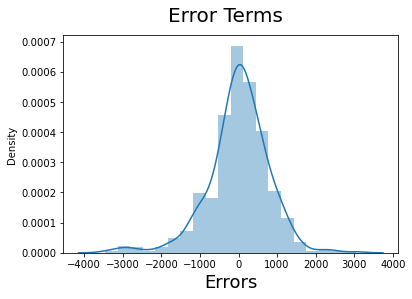

In [41]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18) 

Error terms seem to be normally distributed

Creating the same model for Test dataset

In [42]:
y_test = df_test.pop('cnt')
X_test = df_test

In [47]:
# Adding a constant variable 
X_test = sm.add_constant(X_test)

In [48]:
X_test_new = X_test[X_train_new.columns]

In [49]:
y_pred = lm.predict(X_test_new)

Model Evaluation

Text(0, 0.5, 'y_pred')

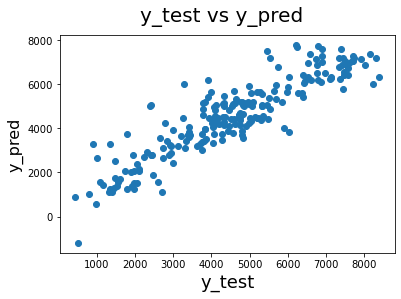

In [51]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Finally, checking the R2 Score of y_test vs y_pred

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8053070041261997